# Data analysis solution

In [4]:
import urllib3
from bs4 import BeautifulSoup
import re
from collections import Counter
import pandas as pd
import json
import datetime
import csv

scraper_objs=[]
input_urls={'smh':'http://www.smh.com.au','abc':'http://www.abc.net.au/'}

class Scraper:
    url=""
    word_counts=Counter()
    article=""
    author=""
    today= None
    
def make_Scraper(url,count,article_url):
    scraper=Scraper()
    scraper.url=url
    scraper.word_counts=count
    scraper.article=article_url
    scraper.today=datetime.date.today()

    return scraper

def pretty_print(self):
     return (self.url,self.article,self.word_counts)



def findStringInHTML(html,strs):
    word_counts = Counter()
    
    soup = BeautifulSoup(html,"lxml")
    for strng in strs:
       results=soup(text=re.compile(strng)) 
       
       word_counts[strng]+=len(results)
    return word_counts
       
def findStringForSMH(soup):
    divs= soup.find_all("div", class_="story__wof")
    return divs
    
def findStringForABC(soup):
    divs= soup.find_all("div", class_="article")
    return divs


def findInTag(tags,url,lst):
    for tag in tags:
       for link in tag.find_all('a',href=True):
        #Look thru article
          article_url =(link['href']   ) 
          if 'http' in article_url:
            http = urllib3.PoolManager()
            req = http.request('GET', article_url)
            article_content=req.data
            if req.status==200:
            #Hit the url and look for string
                words=findStringInHTML(article_content,lst)
                obj=make_Scraper(url,words,article_url)
                scraper_objs.append(obj)
  
def findStringInArticles(url,html,lst,specific_website):
    soup=BeautifulSoup(html,'lxml')
    if specific_website=='smh':
        divs=findStringForSMH(soup)
    elif specific_website=='abc':
        divs=findStringForABC(soup)

    findInTag(divs,url,lst)
   

def writeCSV(mylist,search,header):
    rows=[]
    for i in mylist:
        ct=i.word_counts
        rest_arr=[i.url,i.article,i.today]
        search=[]
        for k in ct:
            search.append(ct[k])
        rows.append(rest_arr+search)
        
    with open('tp.csv', 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',')
        spamwriter.writerow(header)
        spamwriter.writerows(rows)
        
 
    
  
        
       

def hitURL(url):
    
    http = urllib3.PoolManager()
    req = http.request('GET', url)
    return req.data


def main():

    search_string=['Trump|America','Trump','Trump|^Russia','Trump|Russia','Russia','Australia']
    header_reqd=['Parent_URL','Article_URL','Time']
    header_reqd=header_reqd+(search_string)
    for key in input_urls:
        print(key,input_urls[key])
        htmlpage=hitURL(input_urls[key])
        findStringInArticles(input_urls[key],htmlpage,search_string,key)
        print("************************************************")

        writeCSV(scraper_objs,search_string,header_reqd)
      
if __name__ == "__main__":
    main()
    print("Done******")
    df=pd.read_csv("tp.csv")
    print(df.head())

smh http://www.smh.com.au


/Users/priya/anaconda/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/priya/anaconda/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/priya/anaconda/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/priya/anaconda/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRe

************************************************
abc http://www.abc.net.au/
************************************************
Done******
              Parent_URL                                        Article_URL  \
0  http://www.smh.com.au  http://www.smh.com.au/nsw/experts-warn-of-proc...   
1  http://www.smh.com.au  http://www.smh.com.au/nsw/im-raping-you-becaus...   
2  http://www.smh.com.au  http://www.smh.com.au/nsw/driving-unlicensed-i...   
3  http://www.smh.com.au  http://www.smh.com.au/nsw/the-three-borneo-sch...   
4  http://www.smh.com.au  http://www.smh.com.au/nsw/child-indecently-ass...   

         Time  Trump|America  Trump  Trump|^Russia  Trump|Russia  Russia  \
0  2017-05-28              0      0              0             0       0   
1  2017-05-28              0      0              0             0       0   
2  2017-05-28              0      0              0             0       0   
3  2017-05-28              0      0              0             0       0   
4  2017-0

[[<matplotlib.text.Text at 0x1189befd0>,

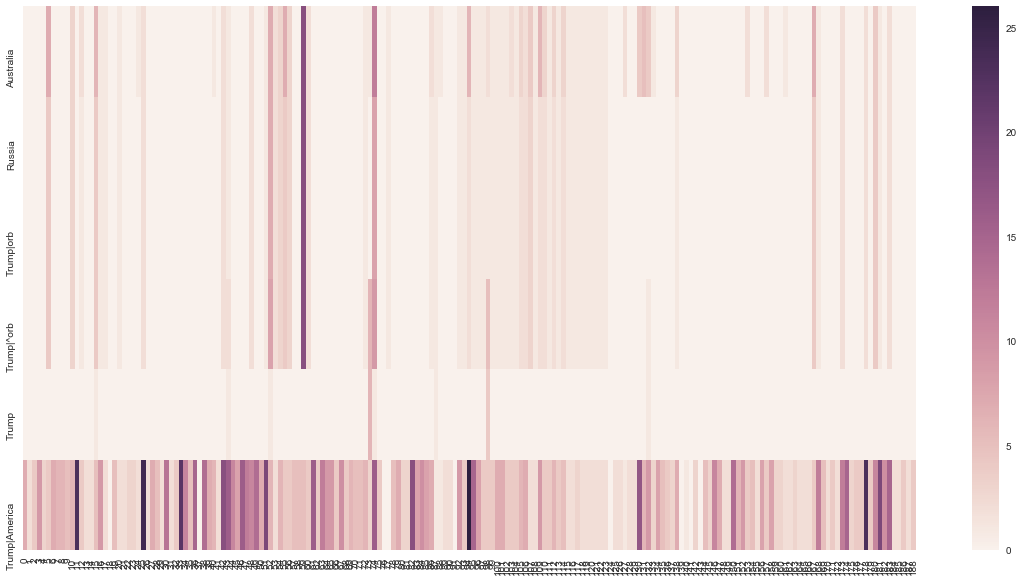

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)
df1=df.loc[df.Parent_URL=='http://www.smh.com.au']
data =  np.array([df1['Trump|America'],df1['Trump'],df1['Trump|^Russia'],df1['Trump|Russia'],df1['Russia'],df1['Australia']])
#labels=np.array([['Trump']*16,['Russia']*16,['Australia']*16])
fig, ax = plt.subplots()
ax = sns.heatmap(data,  fmt = '')
ax.set(yticklabels=['Trump|America','Trump','Trump|^orb','Trump|orb','Russia','Australia'])


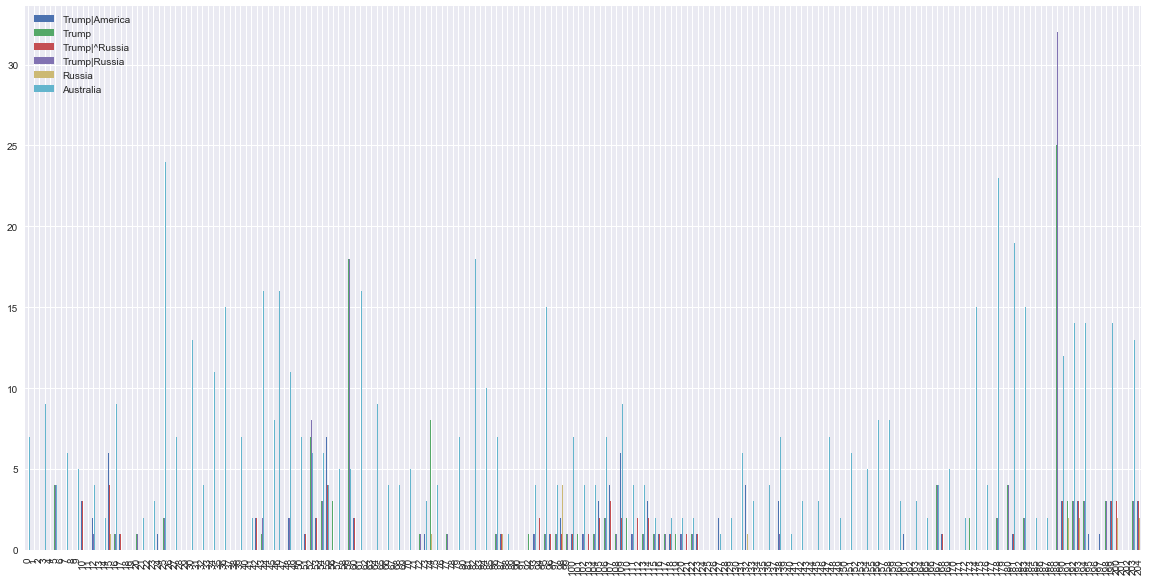

In [6]:
df.plot(kind='bar')

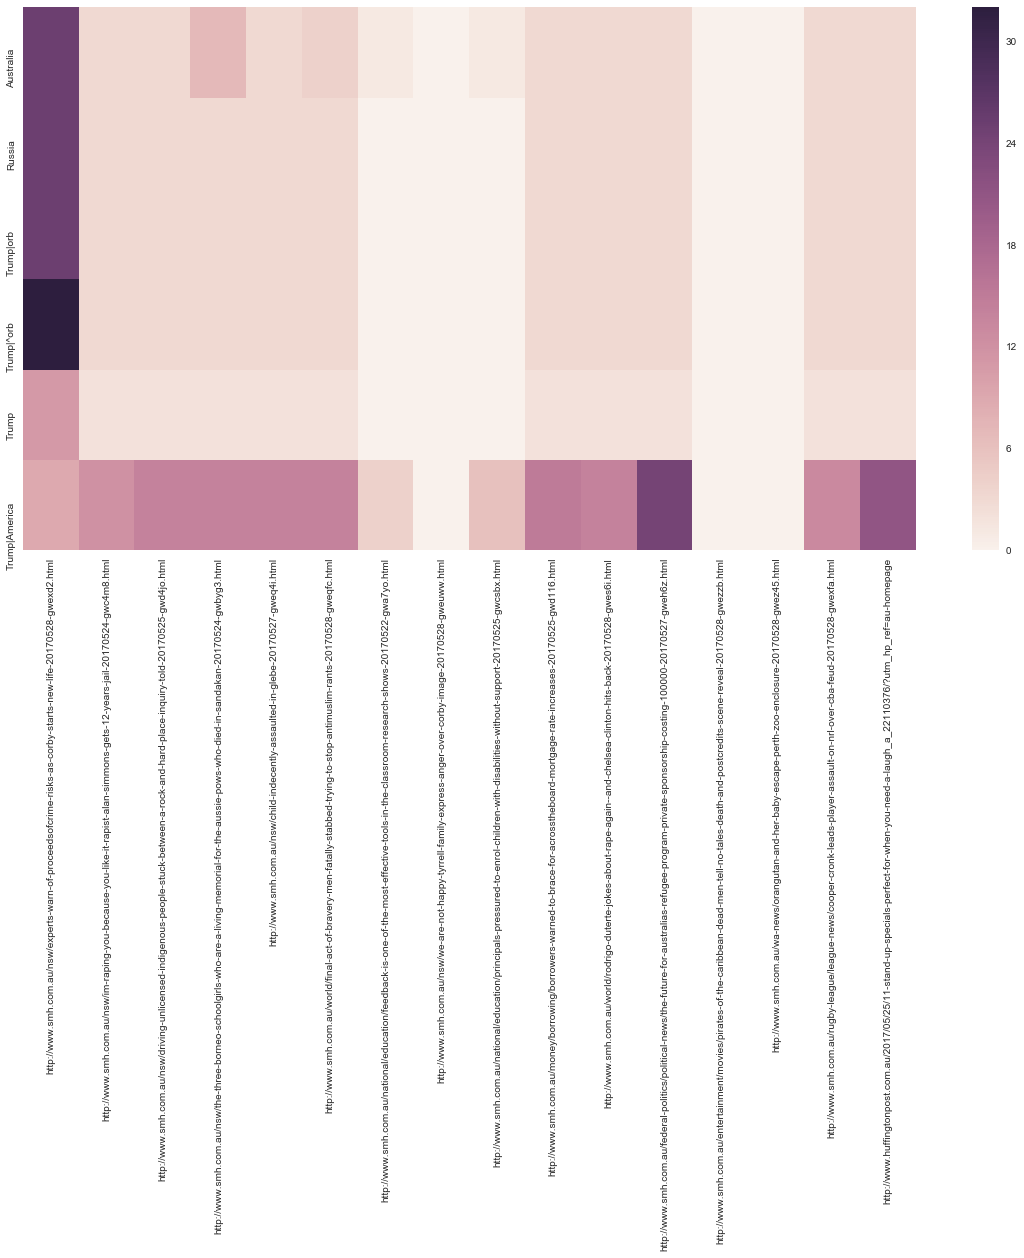

In [7]:
df1=df.loc[df.Parent_URL=='http://www.abc.net.au/']
data =  np.array([df1['Trump|America'],df1['Trump'],df1['Trump|^Russia'],df1['Trump|Russia'],df1['Russia'],df1['Australia']])
fig, ax = plt.subplots()
ax = sns.heatmap(data,fmt='')
ax.set(yticklabels=['Trump|America','Trump','Trump|^orb','Trump|orb','Russia','Australia'])
ax.set(xticklabels=df.Article_URL)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

(16,)